# Data Preprocessing

The following tutorial contains Python examples for data preprocessing. You should refer to the "Data" chapter of the "Introduction to Data Mining" book to understand some of the concepts introduced in this tutorial. 


O pré-processamento de dados consiste em um amplo conjunto de técnicas para limpeza, seleção e transformação de dados para aprimorar a análise de mineração de dados. Leia as instruções passo a passo abaixo com cuidado. Para executar o código, clique na célula correspondente e pressione as teclas SHIFT-ENTER simultaneamente.

## 4.1 Problemas de qualidade de dados

A baixa qualidade dos dados pode ter um efeito adverso na mineração de dados. Entre os problemas comuns de qualidade de dados estão ruído, valores discrepantes, valores ausentes e dados duplicados. 

Começamos com um conjunto de dados de exemplo do repositório de aprendizado de máquina da UCI que contém informações sobre pacientes com câncer de mama.


### Primeiro, faça o download do conjunto de dados usando a função Pandas read_csv() e exiba seus primeiros 5 pontos de dados, exiba o número de instâncias e de atributos.

'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'

Colunas 'Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class'

In [1]:
import pandas as pd

In [2]:
cols = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses','Class']

In [3]:
DF = pd.read_csv('breast-cancer-wisconsin.data', names=cols)

In [4]:
DF.head(5)

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
DF.shape

(699, 11)

### Valores faltantes  (Missing Values)

Não é incomum que um objeto não tenha um ou mais valores de atributo. Em alguns casos, as informações não foram coletadas; enquanto em outros casos, alguns atributos são inaplicáveis às instâncias de dados. Esta seção apresenta exemplos das diferentes abordagens para lidar com valores ausentes.

De acordo com a descrição dos dados (https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original), os valores omissos são codificados como '?' Nos dados originais. 

### Agora sua tareda é converter os valores ausentes em NaNs. Podemos então contar o número de valores ausentes em cada coluna dos dados.


In [6]:
import numpy as np

In [7]:
DF.replace('?', np.nan, inplace=True )

In [8]:
DF.isna().sum()

Sample code                     0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

Observe que apenas a coluna 'Bare Nuclei' contém valores omissos. 

### Substitua os valores ausentes na coluna "Bare Nuclei"  pelo valor mediano dessa coluna. Mostre valores antes e depois da substituição  para um subconjunto dos dados.


In [9]:
df1 = pd.DataFrame(data=DF.values, columns=DF.columns)

In [10]:
df1.replace(np.nan, DF['Bare Nuclei'].median(), inplace=True)

In [11]:
df1.isna().sum()

Sample code                    0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

### Em vez de substituir os valores ausentes, outra abordagem comum é descartar os pontos de dados que contêm valores ausentes. Isso pode ser feito facilmente aplicando a função dropna() ao quadro de dados. Execute essa abordagem e exiba o número de linhas antes e depois desse tratamento.


In [12]:
df2 = pd.DataFrame(data=DF.values, columns=DF.columns)

In [13]:
df2.isna().sum()

Sample code                     0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [14]:
df2.shape

(699, 11)

In [15]:
df2.dropna(axis=0, inplace=True)

In [16]:
df2.isna().sum()

Sample code                    0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [17]:
df2.shape

(683, 11)

### Outliers (Ruídos)

Os outliers são instâncias de dados com características consideravelmente diferentes do restante do conjunto de dados. 

### Utilizabdo a matplotlib, apressente um boxplot para identificar as colunas na tabela que contêm outliers. Observe que os valores em todas as colunas (exceto 'Bare Nuclei') são originalmente armazenados como 'int64', enquanto os valores na coluna 'Bare Nuclei' são armazenados como objetos de string (já que a coluna contém strings como '?' representando valores ausentes). Assim, você deve converter a coluna em valores numéricos antes de criar o boxplot. Caso contrário, a coluna não será exibida ao desenhar o boxplot.


In [18]:
#usarei o dataframe df1 pois já está com os valores nulos substituidos para que o dataframe original 
#continue com os dados originais, caso precise.

In [19]:
#get_obj = df1.select_dtypes('object').columns
#df1 = pd.get_dummies(df1, prefix=get_obj, columns=get_obj, drop_first=True)
#usando get_dummies não se mostrou ser eficiente nesse caso, pois se tornou dificil para analisar os outliers

In [20]:
#tranformando a coluna 'Bare Nuclei' em int64 
df1['Bare Nuclei'] = df1['Bare Nuclei'].astype('int64')

In [21]:
df1.dtypes

Sample code                    int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [22]:
df1.shape

(699, 11)

In [23]:
df1.boxplot(figsize=(30,30))

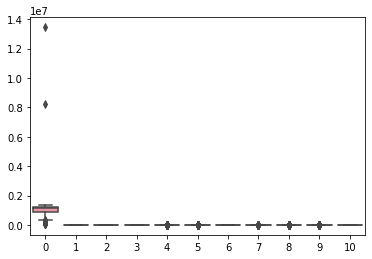

In [24]:
#outro modo é usando a biblioteca SNS que é baseada em matplotlib
%matplotlib inline
import seaborn as sns
sns.boxplot(data=df1.values)

### Os boxplots devem sugerir que apenas 5 das colunas (Marginal Adhesion, Single Epithetial Cell Size, Bland Cromatin, Normal Nucleoli, and Mitoses) contêm valores anormalmente altos. Para descartar os outliers, podemos calcular a pontuação Z para cada atributo e remover as instâncias que contêm atributos com pontuação Z anormalmente alta ou baixa (por exemplo, se Z > 3 ou Z <= -3).
A pontuação Z é dada por Z=(X-Xmedio)/std, ou seja, o valor de cada atributo vai ser substitui por ele menos a média da coluna, dividido pelo desvio padrão da coluna. 
Observe que os valores omissos (NaN) não são afetados pelo processo de padronização.

In [25]:
def Zscore(x):
    X_np = np.asarray(x)
    Z = ((X_np - X_np.mean())/X_np.std())
    return Z

In [26]:
#Z_res guardará os valores de zscore
Z_res = []
for i in df1.columns:
    Z_res.append(Zscore(df1[i]));

In [27]:
# Z será a transposta de um array numpy para que fique com a mesma orientação do nosso dataframe
Z = np.asarray(Z_res).T

In [28]:
Z.shape

(699, 11)

In [29]:
Z

array([[-0.11623873,  0.20693572, -0.69999505, ..., -0.61182504,
        -0.34391178, -0.72539705],
       [-0.1115035 ,  0.20693572,  0.28384518, ..., -0.28411186,
        -0.34391178, -0.72539705],
       [-0.09126525, -0.50386559, -0.69999505, ..., -0.61182504,
        -0.34391178, -0.72539705],
       ...,
       [-0.29657482,  0.20693572,  2.25152563, ...,  2.33759359,
         0.23956962,  1.37855538],
       [-0.28254589, -0.14846494,  1.59563215, ...,  1.02674087,
        -0.34391178,  1.37855538],
       [-0.28254589, -0.14846494,  1.59563215, ...,  0.37131451,
        -0.34391178,  1.37855538]])

### Descarte colunas com Z> 3 ou Z <= -3.

In [30]:
for i in range(df1.shape[1]): #percorrerá as colunas
    for j in range(df1.shape[0]): #percorrerá as linhas
# a condição testará se o valor não está acima ou abaixo dos limiares estabelecidos 
# e se a linha ainda não foi removida
        if(Z[j][i] > 3 or Z[j][i] <= -3) and (j in df1.index): 
            print(Z[j][i]) 
            df1.drop(j, inplace=True)

11.614289471097432
20.08037686769253
3.065905839698959
3.065905839698959
3.065905839698959
3.065905839698959
3.065905839698959
3.065905839698959
3.065905839698959
3.065905839698959
3.065905839698959
3.065905839698959
3.065905839698959
3.065905839698959
3.065905839698959
3.065905839698959
3.065905839698959
3.065905839698959
3.065905839698959
3.065905839698959
3.065905839698959
3.065905839698959
3.065905839698959
3.065905839698959
3.065905839698959
3.065905839698959
3.065905839698959
3.065905839698959
3.065905839698959
3.065905839698959
3.065905839698959
3.065905839698959
3.065905839698959
4.907420801562092
3.7404580050688447
3.1569766068222207
3.1569766068222207
3.7404580050688447
3.1569766068222207
4.907420801562092
3.1569766068222207
4.907420801562092
4.907420801562092
4.907420801562092
3.7404580050688447
3.7404580050688447
4.907420801562092
3.1569766068222207
3.7404580050688447
3.1569766068222207
4.907420801562092


In [31]:
df1.shape

(648, 11)

### Dados duplicados


Alguns conjuntos de dados, especialmente aqueles obtidos pela fusão de várias fontes de dados, podem conter duplicações ou instâncias quase duplicadas. O termo deduplicação é freqüentemente usado para se referir ao processo de lidar com problemas de dados duplicados.


### Verifique instâncias duplicadas no conjunto de dados de câncer de mama, apresentando o número de instâncias duplicadas

In [32]:
df1.duplicated().sum()

8

### Embora essas linhas duplicadas possam corresponder a amostras para indivíduos diferentes, neste exemplo hipotético, supomos que as duplicadas são amostras obtidas do mesmo indivíduo. Remova as linhas duplicadas e mostre o número de linhas antes e depois desse processo.

In [33]:
df1.shape

(648, 11)

In [34]:
df1.drop_duplicates(inplace=True)

In [35]:
df1.shape

(640, 11)

## Agregação

A agregação de dados é uma tarefa de pré-processamento em que os valores de dois ou mais objetos são combinados em um único objeto. A motivação para agregação inclui (1) reduzir o tamanho dos dados a serem processados, (2) alterar a granularidade da análise (de escala fina para escala mais grosseira) e (3) melhorar a estabilidade dos dados.

Agora utilize os dados da série temporal de precipitação diária para uma estação meteorológica localizada no Detroit Metro Airport (arquivo 'DTW_prec.csv'). Os dados brutos foram obtidos do site Climate Data Online (https://www.ncdc.noaa.gov/cdo-web/). A série temporal de precipitação diária será comparada com os valores mensais.


### Carregue os dados da série temporal de precipitação

In [36]:
DF_DTW = pd.read_csv('DTW_prec.csv', na_values='?')

In [37]:
DF_DTW.head(10)

,DATE,PRCP
0,1/1/2001,0.00
1,1/2/2001,0.00
2,1/3/2001,0.00
3,1/4/2001,0.04
4,1/5/2001,0.14
5,1/6/2001,0.00
6,1/7/2001,0.01
7,1/8/2001,0.00
8,1/9/2001,0.00
9,1/10/2001,0.00


In [38]:
DF_DTW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6191 entries, 0 to 6190
Data columns (total 2 columns):
DATE    6191 non-null object
PRCP    6191 non-null float64
dtypes: float64(1), object(1)
memory usage: 96.9+ KB


 ### Desenhe um gráfico de linha das séries temporais diárias.

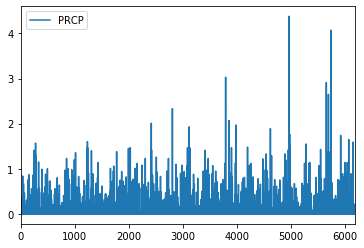

In [39]:
DF_DTW.plot(kind='line')

### Observe que a série temporal diária parece ser bastante caótica e varia significativamente de um passo para outro.Crie séries temporais agregadas por mês para obter os valores totais mensais de precipitação. Plot a série temporal resultante, ela deve variar mais suavemente em comparação com a série temporal diária.

In [40]:
#convertendo a coluna DATE que está como string para datetime
DF_DTW['DATE'] = pd.to_datetime(DF_DTW['DATE'], format="%m/%d/%Y")

In [41]:
#transformando a coluna DATE no index do dataframe, para facilitar a agregação
DF_DTW.set_index('DATE', inplace=True)

In [42]:
DF_DTW.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6191 entries, 2001-01-01 to 2017-12-31
Data columns (total 1 columns):
PRCP    6191 non-null float64
dtypes: float64(1)
memory usage: 96.7 KB


In [43]:
DF_DTW.head()

,PRCP
DATE,
2001-01-01,0.00
2001-01-02,0.00
2001-01-03,0.00
2001-01-04,0.04
2001-01-05,0.14


DATE
1     AxesSubplot(0.125,0.2;0.775x0.68)
2     AxesSubplot(0.125,0.2;0.775x0.68)
3     AxesSubplot(0.125,0.2;0.775x0.68)
4     AxesSubplot(0.125,0.2;0.775x0.68)
5     AxesSubplot(0.125,0.2;0.775x0.68)
6     AxesSubplot(0.125,0.2;0.775x0.68)
7     AxesSubplot(0.125,0.2;0.775x0.68)
8     AxesSubplot(0.125,0.2;0.775x0.68)
9     AxesSubplot(0.125,0.2;0.775x0.68)
10    AxesSubplot(0.125,0.2;0.775x0.68)
11    AxesSubplot(0.125,0.2;0.775x0.68)
12    AxesSubplot(0.125,0.2;0.775x0.68)
dtype: object

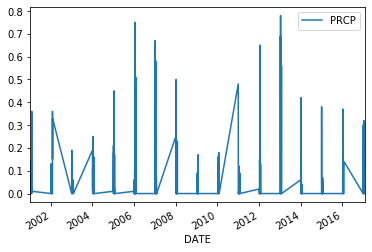

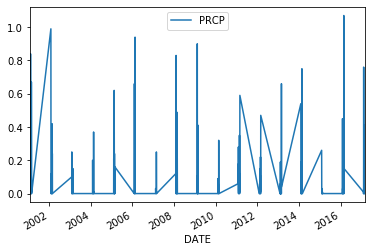

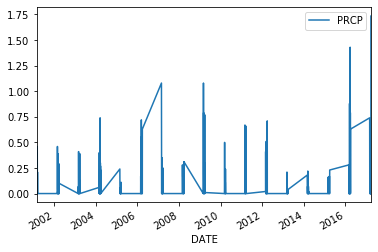

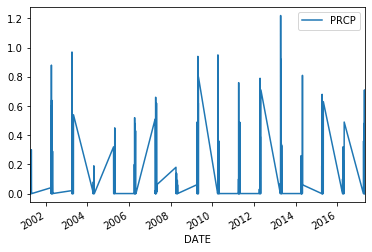

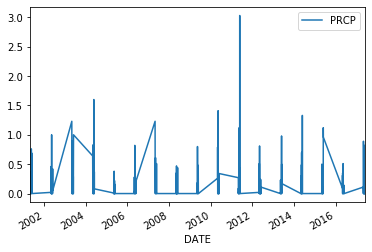

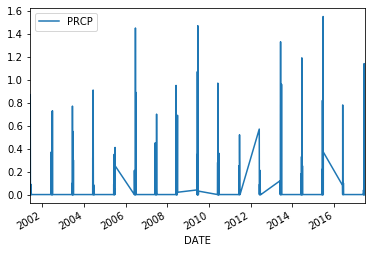

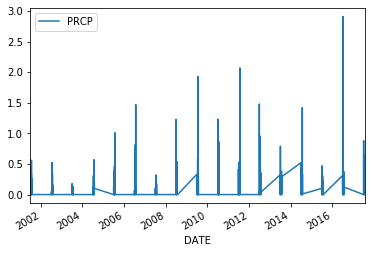

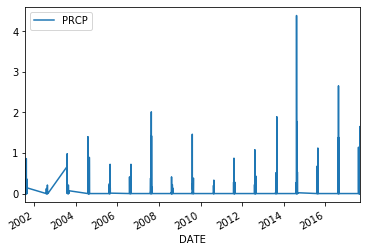

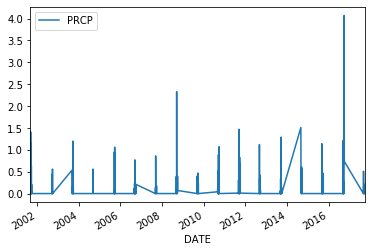

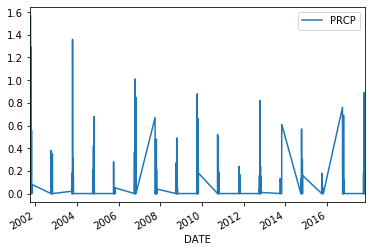

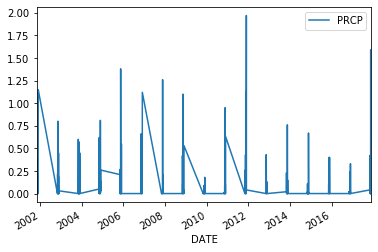

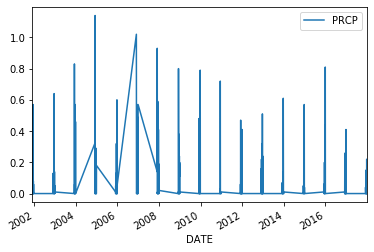

In [44]:
DF_DTW.groupby(DF_DTW.index.month).plot(kind="line")

###  Agora agrupe e agregue por ano para obter os valores de precipitação anuais e plot o resultado.


DATE
2001    AxesSubplot(0.125,0.125;0.775x0.755)
2002    AxesSubplot(0.125,0.125;0.775x0.755)
2003    AxesSubplot(0.125,0.125;0.775x0.755)
2004    AxesSubplot(0.125,0.125;0.775x0.755)
2005       AxesSubplot(0.125,0.2;0.775x0.68)
2006    AxesSubplot(0.125,0.125;0.775x0.755)
2007       AxesSubplot(0.125,0.2;0.775x0.68)
2008    AxesSubplot(0.125,0.125;0.775x0.755)
2009    AxesSubplot(0.125,0.125;0.775x0.755)
2010    AxesSubplot(0.125,0.125;0.775x0.755)
2011    AxesSubplot(0.125,0.125;0.775x0.755)
2012    AxesSubplot(0.125,0.125;0.775x0.755)
2013    AxesSubplot(0.125,0.125;0.775x0.755)
2014       AxesSubplot(0.125,0.2;0.775x0.68)
2015       AxesSubplot(0.125,0.2;0.775x0.68)
2016    AxesSubplot(0.125,0.125;0.775x0.755)
2017       AxesSubplot(0.125,0.2;0.775x0.68)
dtype: object

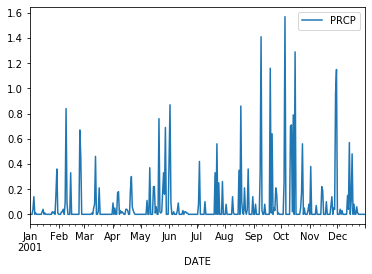

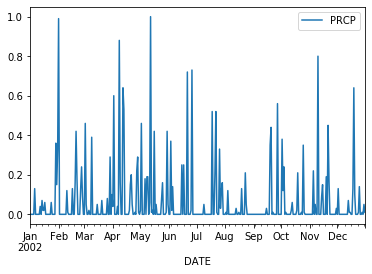

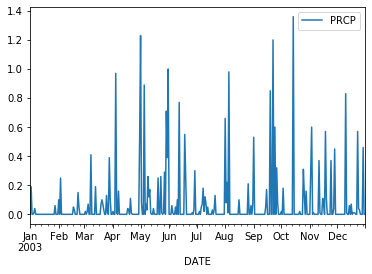

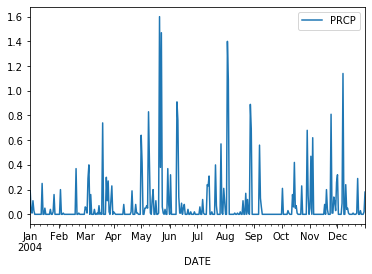

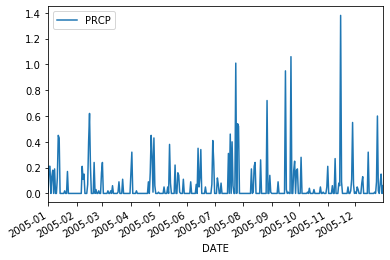

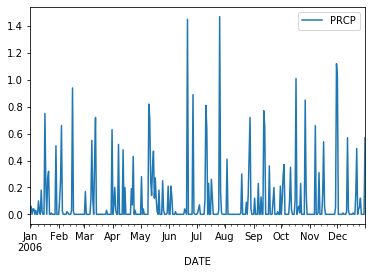

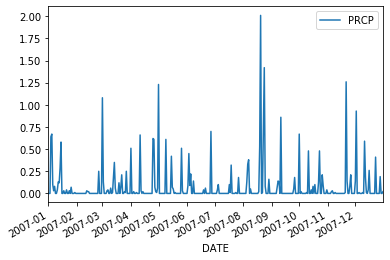

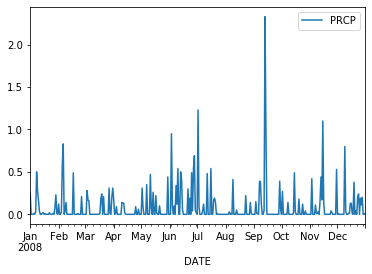

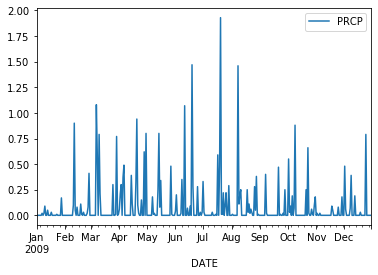

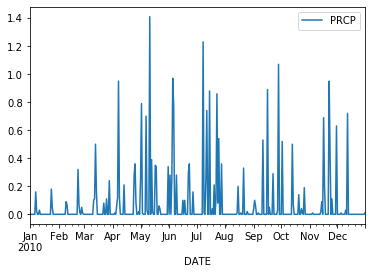

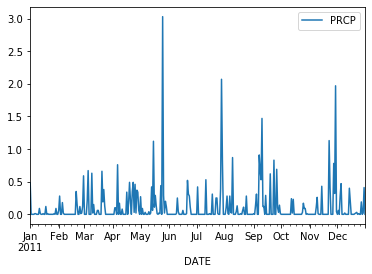

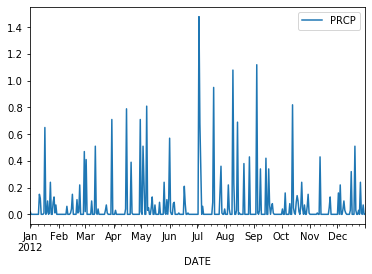

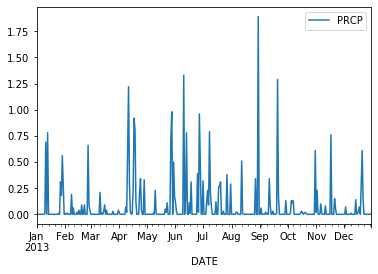

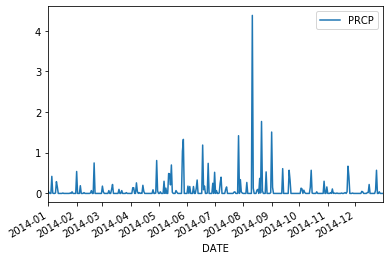

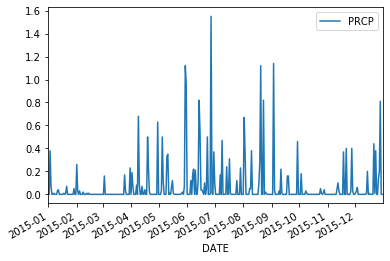

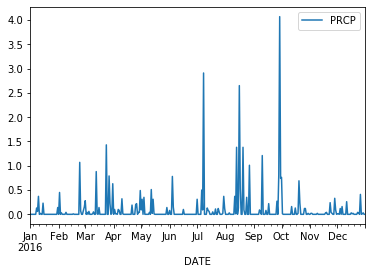

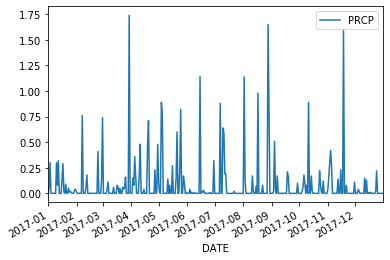

In [45]:
DF_DTW.groupby(DF_DTW.index.year).plot(kind="line")

## Sampling

Amostragem é uma abordagem comumente usada para facilitar (1) a redução de dados para análise exploratória de dados e ampliação de algoritmos para aplicações de big data e (2) quantificação de incertezas devido a distribuições de dados variáveis. Existem vários métodos disponíveis para amostragem de dados, como amostragem sem substituição, onde cada instância selecionada é removida do conjunto de dados e amostragem com substituição, onde cada instância selecionada não é removida, permitindo que ela seja selecionada mais de uma vez na amostra .


### Aplique a amostragem com substituição e sem substituição ao conjunto de dados de câncer de mama obtido no repositório de aprendizado de máquina da UCI.


### Selecione uma amostra de tamanho 3  aleatoriamente (sem substituição) dos dados originais.


In [46]:
df1.sample(3, random_state=42)

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
626,1190386,4,6,6,5,7,6,7,7,3,4
304,653777,8,3,4,9,3,10,3,3,1,4
332,770066,5,2,2,2,2,1,2,2,1,2


### Selecione aleatoriamente 1% dos dados (sem substituição) e exiba as amostras selecionadas. 

In [47]:
df1.sample(frac=0.01, random_state=42)

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
626,1190386,4,6,6,5,7,6,7,7,3,4
304,653777,8,3,4,9,3,10,3,3,1,4
332,770066,5,2,2,2,2,1,2,2,1,2
654,1325159,3,1,1,1,2,1,3,1,1,2
197,1213383,5,1,1,4,2,1,3,1,1,2
284,508234,7,4,5,10,2,10,3,8,2,4


## Por fim, realize uma amostragem com substituição para criar uma amostra cujo tamanho é igual a 1% de todos os dados. Você deve poder observar instâncias duplicadas na amostra ao aumentar o tamanho da amostra.

In [48]:
df1.sample(frac=0.01, random_state=42, replace=True)

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
115,1173347,1,1,1,1,2,5,1,1,1,2
486,1070522,3,1,1,1,1,1,2,1,1,2
309,673637,3,1,1,1,2,5,5,1,1,2
120,1174057,1,1,2,2,2,1,3,1,1,2
77,1133041,5,3,1,2,2,1,2,1,1,2
20,1054590,7,3,2,10,5,10,5,4,4,4


## Discretização

Discretização é uma etapa de pré-processamento de dados que é frequentemente usada para transformar um atributo de valor contínuo em um atributo categórico. O exemplo abaixo ilustra dois métodos de discretização simples, mas amplamente utilizados (largura igual e frequência igual), aplicados ao atributo 'Clump Thickness' do conjunto de dados de câncer de mama.

### Plot um histograma que mostra a distribuição dos valores dos atributos. A função value_counts() também pode ser aplicada para contar a frequência de cada valor de atributo.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c536d27d0>,
      dtype=object)

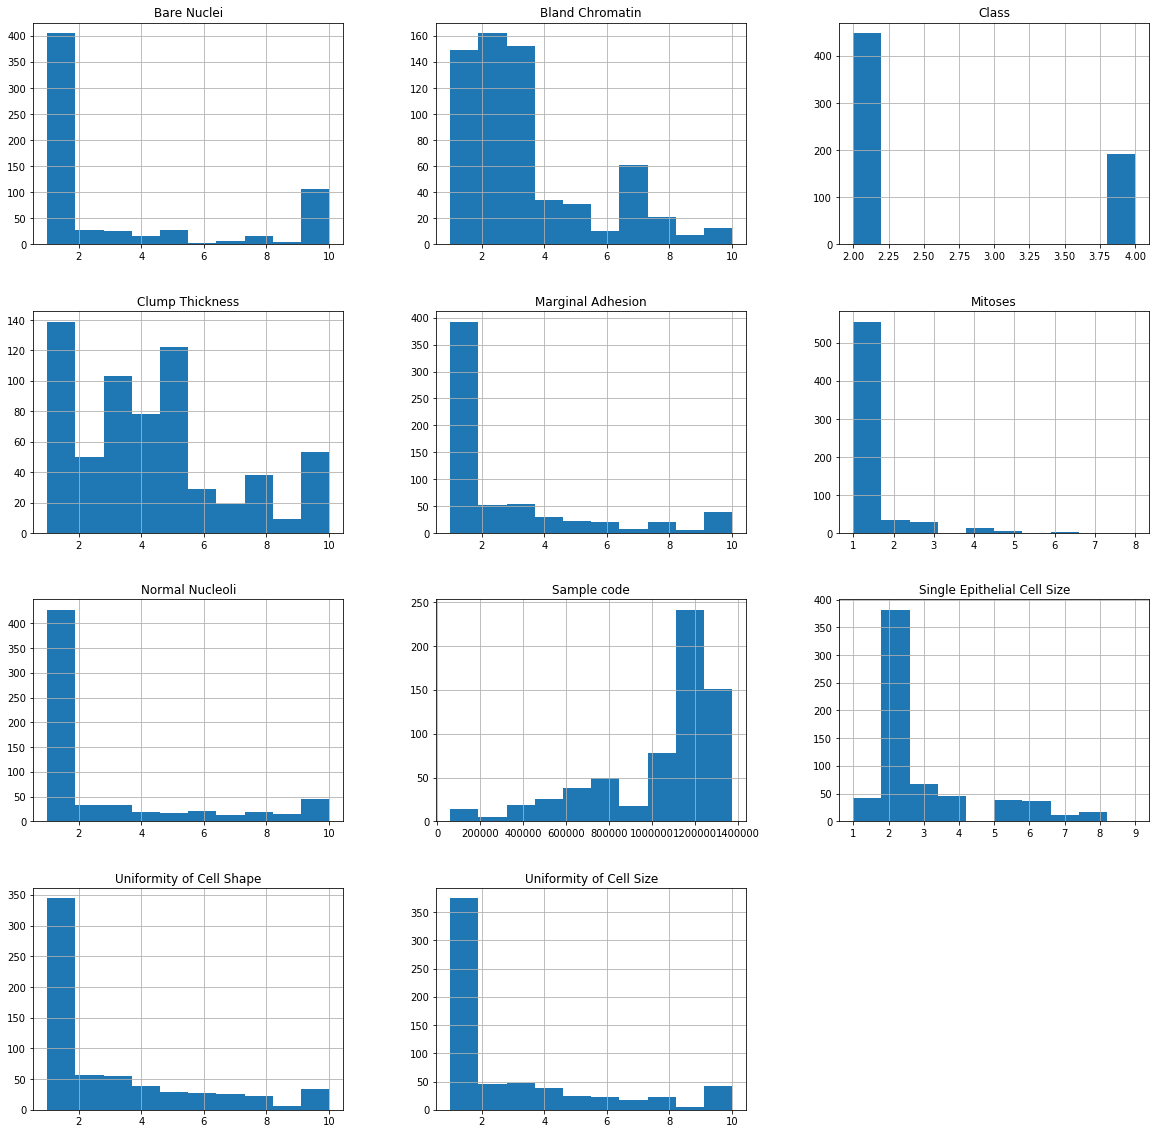

In [49]:
df1.hist(figsize=(20,20))

### Para o método de largura igual, aplique a função cut() para discretizar o atributo em 4 bins de larguras de intervalo semelhantes. A função value_counts() pode ser usada para determinar o número de instâncias em cada bin.


In [50]:
pd.cut(df1['Clump Thickness'], 4).value_counts()

(0.991, 3.25]    292
(3.25, 5.5]      200
(7.75, 10.0]     100
(5.5, 7.75]       48
Name: Clump Thickness, dtype: int64

### Para o método de frequência igual, aplique a função qcut() ppara particionar os valores em 4 compartimentos, de forma que cada bin tenha quase o mesmo número de instâncias.


In [51]:
pd.qcut(df1['Clump Thickness'], 4).value_counts()

(0.999, 2.0]    189
(2.0, 4.0]      181
(5.0, 10.0]     148
(4.0, 5.0]      122
Name: Clump Thickness, dtype: int64


**<font color='blue'>References:</font>**

1. Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. 

2. Mangasarian, O.L. and Wolberg, W. H. (1990). "Cancer diagnosis via linear programming", SIAM News, Volume 23, Number 5, pp 1 & 18.

3. Wolberg, W.H. and Mangasarian, O.L. (1990). "Multisurface method of pattern separation for medical diagnosis applied to breast cytology", Proceedings of the National Academy of Sciences, U.S.A., Volume 87, pp 9193-9196. 

4. Climate Data Online [https://www.ncdc.noaa.gov/cdo-web/]. 